<a href="https://colab.research.google.com/github/hyeokjun0804/ML-DL/blob/main/06_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#특성 공학과 규제
###IT융합자율학부 201814076 권혁준

##Pandas 판다스
######데이터 분석에 널리 쓰이는 파이썬 라이브러리
######데이터프레임(DataFrame)이라는 자료 구조를 사용
###### 엑셀의 시트와 같은 테이블(표) 형태의 데이터를 저장
######넘파이 배열 객체로 쉽게 변환할 수 있음

In [ ]:
import pandas as pd #pd는 관례적으로 사용하는 판다스의 별칭
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
from sklearn.model_selection import train_test_split

#훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

##변환기 transform
######특성을 만들거나 전처리하기 위해 사이킷런이 제공하는 다양한 클래스
######사이킷런 변환기 객체
######fit() 메서드
######transform() 메서드
######사이킷런 예측기
######LinearRegression, KNeighborsClassifier, KNeighborsRegressor 클래스 등
######for(), predict(), score() 메서드 등을 제공

PolynomialFeatures
######sklearn.preprocessing 모듈에 포함
######기본 값으로 각 특성을 제곱한 항을 추가하고, 특성끼리 서로 곱한 항을 추가함

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [ ]:
print(poly.transform([[2, 3], [5, 6]]))

[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  5.  6. 25. 30. 36.]]


In [ ]:
poly = PolynomialFeatures(include_bias = False) #False 사용시 절편 항 제거
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
print(poly.transform([[2, 3], [5, 6]]))

[[ 2.  3.  4.  6.  9.]
 [ 5.  6. 25. 30. 36.]]


In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

##다중 회귀 모델

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594111


In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False) #degree는 고차항의 최대 차수를 지정할 수 있음
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2',
       'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1',
       'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2',
       'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2',
       'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4',
       'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5',
       'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5'],
      dtype=object)

In [ ]:
print(lr.score(test_poly, test_target))

-144.40579436844948


##규제 regularization
######머신러닝 알고리즘이 훈련 세트를 과도하게 학습하지 못 하도록 훼방을 놓는 것
###### - 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
######선형 회귀 모델에서는 특성에 곱해지는 계수(가중치, 기울기)의 크기를 작게 만드는일
######특성의 스케일을 표준화해야 규제를 적용할 떄 공정하게 제어할 수 있음
######규제가 있는 회귀 알고리즘
- 릿지 회귀 모델
- 라쏘 회귀 모델

In [ ]:
lr.coef_

array([-2.09046286e+04, -1.28182176e+03, -5.60568587e+03,  2.08210606e+03,
        1.22297051e+03, -1.43811540e+03, -4.56962070e+03, -5.32891399e+02,
        6.00788378e+03, -2.10700052e+01, -6.86630545e+01, -1.38720413e+03,
       -1.07566030e+03,  3.95364102e+03,  5.36644564e+03,  3.82395517e+03,
       -5.41578595e+03, -7.44650725e+03, -3.57626691e+03, -8.28151607e+00,
        3.60946181e+02, -4.02975688e+02, -3.16263595e+03,  3.78221470e+03,
        1.35360877e+03,  9.49694721e+03, -9.03127653e+03, -7.05277640e+03,
       -5.77034174e+03, -9.30116998e+03,  5.09465751e+03,  9.77745663e+03,
        9.37625135e+03,  7.91894743e+03, -2.17004839e+00,  3.18815197e+01,
        1.05750599e+01,  1.25145412e+02, -1.16343732e+03,  8.34274225e+02,
       -1.83477034e+03,  7.09702960e+03, -1.74946596e+03, -3.82035083e+03,
        5.50888378e+03, -1.57853612e+04, -1.46750807e+03,  8.08789552e+03,
        8.01725139e+03, -5.22510168e+03,  1.18582793e+04,  6.17623466e+03,
       -7.04139964e+03, -

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
train_scaled[:5]

array([[-1.01339619, -1.01007487, -1.01952321, -0.9549757 , -0.9496784 ,
        -0.95745849, -0.93942079, -0.94342509, -0.94100107, -0.88757122,
        -0.88399964, -0.89100599, -0.87785292, -0.88311456, -0.88430909,
        -0.8691891 , -0.87259422, -0.87147928, -0.86603533, -0.82233944,
        -0.82171953, -0.8280588 , -0.81928269, -0.82512549, -0.8278857 ,
        -0.81486775, -0.82006923, -0.82177279, -0.82010716, -0.80835934,
        -0.81274154, -0.81321125, -0.8098514 , -0.80275974, -0.7637909 ,
        -0.76597773, -0.77150714, -0.76668667, -0.77246614, -0.77577893,
        -0.76571689, -0.77162398, -0.77472752, -0.77517751, -0.76290623,
        -0.76877311, -0.77148634, -0.77113383, -0.767785  , -0.75814062,
        -0.76376113, -0.76586966, -0.76449499, -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, -0.76472563, -0.7717585 ,
        -0.77238267, -0.7747325 , -0.77298293, -0.76716811, -0.76291014,
        -0.76770896, -0.77117372, -0.7701438 , -0.

In [ ]:
lr.fit(train_scaled, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
lr.coef_

-2.5974067993492654e+24
-2.6097052589734064e+24


array([  -589630.5040284 ,     58882.34432801,    292479.57213859,
         3614696.47945359,   2676387.94699227,  -4179338.71145696,
         1913385.1339401 ,  -7462398.39295357,   4644311.56858537,
         1112036.40310243, -36636084.4108739 ,   8265194.28843481,
        10957185.77203952,  44560029.59493069, -18234640.4396522 ,
       -10575138.76146999,   7800352.55389997, -11116646.20671695,
         1508213.91432259,  -2366902.47593485,  32780599.62893171,
        -7086928.94870479,   6162417.47231338, -21442493.36986389,
          958974.60150224,  -6479999.56154162, -16087564.33686846,
       -24612356.29665983,  26477275.89038515,  10193063.20609389,
        -2161671.1841041 ,  -1494715.36796788,  18751463.7325785 ,
       -11464734.56621294, -16778724.34630555,  21634520.14393105,
        17961770.29319982, -15580796.05333004,  -3698271.64132283,
         1658671.24819036, -22830889.426497  ,   4544534.087271  ,
       -20028333.07735961,  -7658878.69689594,  12298552.84928

##릿지 회귀 Ridge
######계수를 제곱한 값을 기준으로 규제
######aplha=1.0 매개변수
- 규제 강도를 지정
- 규제 강도가 크면 계수 값은 작아져 과소적합을 유도하고, 규제 강도가 작으면 선형 회귀에 유사해져 과대적합이 발생

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


In [ ]:
ridge.coef_, ridge.intercept_

(array([18.75202605,  9.99048537,  9.64586193, 17.278557  , 14.42089598,
        12.69251285, 12.34283964, 10.88252862, 12.55963482, 12.93825844,
        12.67925897,  9.12136175, 12.49327194,  9.02641662,  8.39716922,
        12.21409663,  8.99564455,  8.85968975, 11.68602892,  7.48294042,
         8.98610839,  3.37199818, 10.27381252,  4.61786228,  1.60700275,
        11.21975321,  5.66171476,  2.9808368 ,  3.17359806, 11.72544455,
         6.40554378,  4.19129005,  5.06384222,  8.89201309,  1.89344091,
         4.81186299, -2.91832747,  7.38733861, -0.51038117, -5.91335297,
         9.5029666 ,  1.56464851, -3.66645267, -6.13031213, 11.06068777,
         3.21356622, -1.71089861, -3.65107495, -2.63704498, 11.98418393,
         4.3636902 , -0.11776857, -1.40420516,  0.45174316,  5.29453248]),
 400.8333333333333)

In [ ]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #릿지 모델을 만듭니다
  ridge = Ridge(alpha=alpha)
  #릿지 모델을 훈련합니다
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장합니다
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

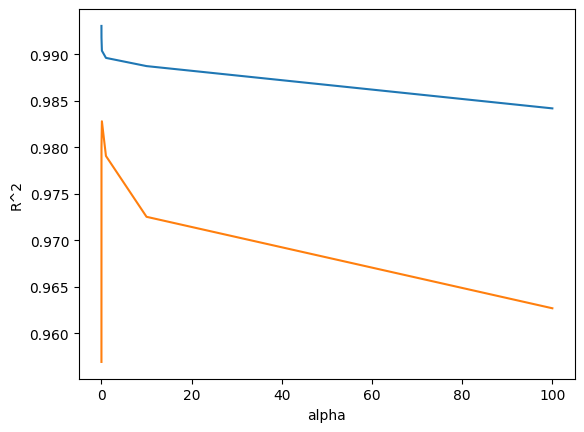

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

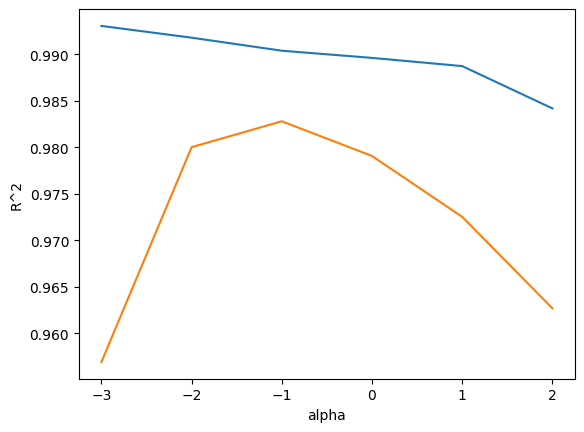

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


##라쏘 회귀
######계수의 절댓값을 기준으로 규제

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
lasso.coef_, lasso.intercept_

(array([ 0.        ,  0.        ,  0.        , 95.61184844, 11.60230215,
         0.        , 10.5804005 ,  0.        , 31.51508869,  0.        ,
        22.30028081,  0.        , 29.10414951,  0.        ,  0.        ,
        18.50441438,  0.        ,  0.        , 41.93702532,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         5.74835225,  0.        ,  0.        ,  0.        , 20.53363452,
         0.        ,  0.        ,  0.        ,  8.8783085 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , 35.3124872 ,
         0.        ,  0.        ,  0.        ,  0.        , 21.35881131,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
 400.8333333333333)

In [ ]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  #라쏘 모델을 만듭니다
  lasso = Lasso(alpha=alpha, max_iter=10000)
  #라쏘 모델을 훈련합니다
  lasso.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장합니다
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


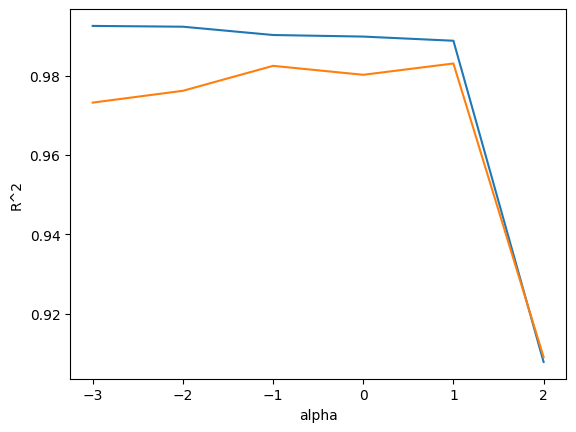

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


In [ ]:
print(np.sum(lasso.coef_ == 0))

40
